In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

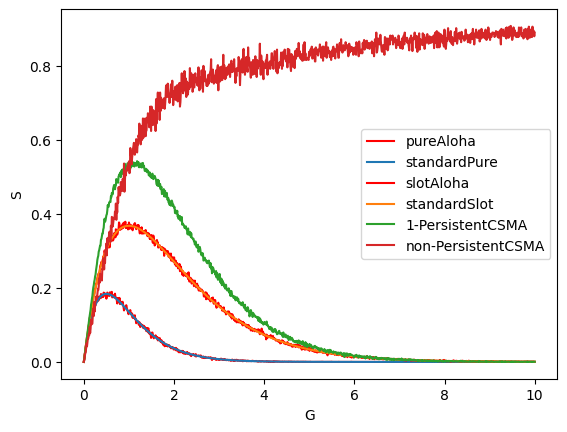

In [4]:

def pureAlohaF(g):
	num = 0
	count = 0
	packetTime = []
	packets = int(g*times/v)
	for i in range(packets):
		packetTime.append(random.uniform(0,times))
	packetTime.sort()
	while(count<packets):
		if(count == packets - 1):
			if(packetTime[count] < times - v):
				num += 1
			break
		if(packetTime[count] >= times):
			break
		if(packetTime[count+1]-packetTime[count] >= v):
			count += 1
			num += 1
		else:
			j = 1
			while(packetTime[count+j]-packetTime[count+j-1]<v):
				j += 1
				if(j+count >= packets):
					break
			count += j
	return num*v/times

def slottedAlohaF(g):
	num = 0
	count = 0
	sumTime = 0.0
	packetTime = []
	packets = int(g*times/v)
	for i in range(packets):
		packetTime.append(random.uniform(0,times))
	packetTime.sort()
	while(sumTime<times):
		if(count >= packets-1):
			break
		j = 0
		while(packetTime[count+j]<sumTime + timeChunk):
			j += 1
			if(count+j>= packets-1):
				if(j == 1):
					num += 1
				break
		count += j
		if(j==1):
			num += j
		sumTime +=timeChunk
	return num*v/times

def persistentCsmaF(g):
	num = 0
	count = 0
	packetTime = []
	packets = int(g*times/v)
	for i in range(packets):
		packetTime.append(random.uniform(0,times))
	packetTime.sort()
	while(count<packets):
		if(count >= packets - 2):
			if(packetTime[count] < times - v):
				num += 1
			break
		if(packetTime[count] >= times):
			break
		if(packetTime[count+1]-packetTime[count] >= 1.5*v):
			count += 1
			num += 1
		else:
			j = 1
			# print count,packets
			while(packetTime[count+j+1]-packetTime[count]<1.25*v):
				j += 1
				if(j+count >= packets-1):
					break
			if(j > 1):
				count += j
			else:
				count += j
				num += j
	return num*v/times


def nonPersistentCsmaF(g):
	num = 0
	count = 0
	lock = 0
	p = 0.01
	packetTime = []
	timeChunk = v*2
	packets = int(g*times/v)
	for i in range(packets):
		packetTime.append(random.uniform(0,times))
	packetTime.sort()
	# print packetTime
	while(count<packets):
		if(count >= packets-2):
			if(packetTime[count] < times - v):
				if(random.random()<p):
					num += 1
			break
		if(packetTime[count] >= times):
			break

		if(lock == 0):
			if(random.random()<p):
				count += 1
				num += 1
				lock = 1
			else:
				packetTime[count] += timeChunk
				packetTime.sort()
		else:
			j = 1
			flag = 0
			result = []
			while(packetTime[count+j]-packetTime[count]<v):
				if(random.random()<p):
					result.append(j)
					# result += 1
					flag += 1
				else:
					packetTime[count+j] += timeChunk
				j += 1
				if(j+count >= packets-1):
					break
			if(flag==1):
				num += 1
				count += 1
			else:
				for i in result:
					packetTime[count+i] += v 
				# count += flag
				packetTime.sort()
			lock = 0
			# print count,j
	return num*v/times

if __name__ == "__main__":

	packets = 100	# so packet moi lan test
	times = 1000.0	#thoi gian test
	v = 2 			
	timeChunk = 2	#thoi gian phuc vu goi
	# G = packets * v / times
	G = np.linspace(0,10,1000)
	SPure = []
	SStanPure = []
	SSlot = []
	SStanSlot = []
	SPerCsma = []
	SPPerCsma = []
	SNonPerCsma = []

	# pure aloha
	for i in G:
		sPure = 0.0
		for j in range(10):
			sPure += pureAlohaF(i)
		SPure.append(sPure/10)
		sStanPure = i*np.exp(-2*i)
		SStanPure.append(sStanPure)
	plt.plot(G,SPure,'r',label='pureAloha')
	plt.plot(G,SStanPure,label='standardPure')
	
	
	# slotted aloha
	for i in G:
		sSlot = 0.0
		for j in range(10):
			sSlot += slottedAlohaF(i)
		SSlot.append(sSlot/10)
		sStanSlot =  i * np.exp(-i)
		SStanSlot.append(sStanSlot)
	plt.plot(G,SSlot,'r',label='slotAloha')
	plt.plot(G,SStanSlot,label='standardSlot')
	
	# # 1-PersistentCSMA 
	for i in G:
		sPerCsma = 0.0
		for j in range(10):
			sPerCsma += persistentCsmaF(i)
		SPerCsma.append(sPerCsma/10)
	plt.plot(G,SPerCsma,label='1-PersistentCSMA')



	# non-persistent CSMA
	# G = np.linspace(0,10,100)
	for i in G:
		sPPerCsma = nonPersistentCsmaF(i)
		SPPerCsma.append(sPPerCsma)
	plt.plot(G,SPPerCsma,label='non-PersistentCSMA')
		
	
	plt.xlabel("G")
	plt.ylabel("S")

	plt.legend()
	plt.show()

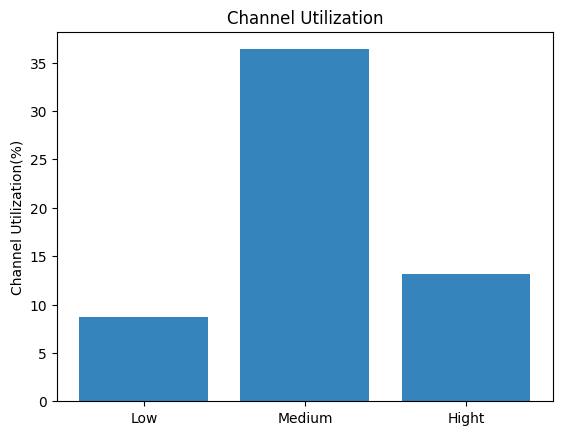

In [10]:
data = [8.7373, 36.3733, 13.1250]
labels = ["Low", "Medium", "High"]

fig1, ax1 = plt.subplots()
x_pos = x_pos = np.arange(len(labels))
ax1.bar(x_pos, data, align='center',
        alpha=0.9, ecolor='black', capsize=10)
ax1.set_title('Channel Utilization')
ax1.set_ylabel("Channel Utilization(%)")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels)
plt.show()

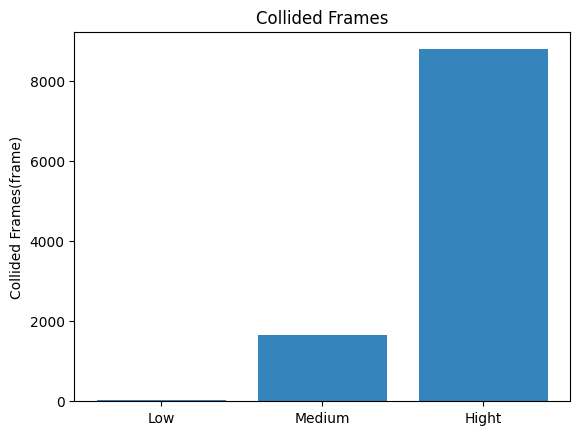

In [11]:
data = [37, 1643, 8779]
labels = ["Low", "Medium", "High"]

fig1, ax1 = plt.subplots()
x_pos = x_pos = np.arange(len(labels))
ax1.bar(x_pos, data, align='center',
        alpha=0.9, ecolor='black', capsize=10)
ax1.set_title('Collided Frames')
ax1.set_ylabel("Collided Frames(frame)")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels)
plt.show()

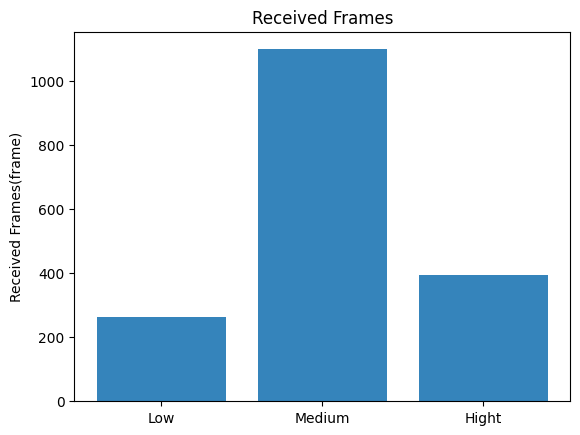

In [12]:
data = [263, 1100, 396]
fig1, ax1 = plt.subplots()
x_pos = x_pos = np.arange(len(labels))
ax1.bar(x_pos, data, align='center',
        alpha=0.9, ecolor='black', capsize=10)
ax1.set_title('Received Frames')
ax1.set_ylabel("Received Frames(frame)")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels)
plt.show()